## Using `SequenceConstraint` to place restrictions on `Components` within the same `ComponentDefinition`

`SequenceConstraints` are used to describe the relative position and orientation between two components within the same component definition. There are four types of restriction that two components can have. They are outlined through the following examples:

1. `ComponentA` precedes `ComponentB`
2. `ComponentA` is the same orientation as `ComponentB`
3. `ComponentA` is the opposite orientation as `ComponentB`
4. `ComponentA` is different from `ComponentB`

Of the four examples, only #4 is not immediatly straight forward.

To demonstrate the various `SequenceConstraints`, we will model the following genetic circuit

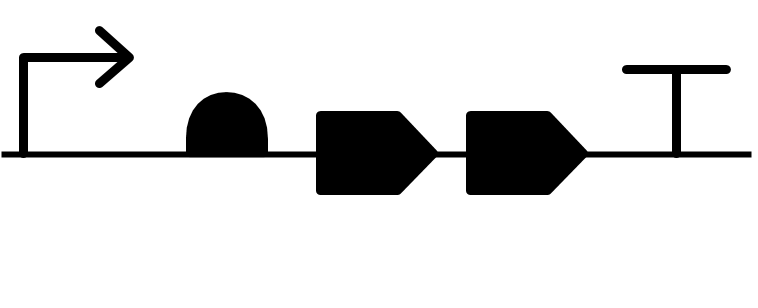


In [ ]:
import sbol2

# Create an SBOL document
doc = sbol2.Document()

# Set a namespace for the document
sbol2.setHomespace('https://github.com/SynBioDex/SBOL-Notebooks')

# Create a ComponentDefinition for the genetic circuit
genetic_cicuit = sbol2.ComponentDefinition('genetic_circuit', sbol2.BIOPAX_DNA)
doc.addComponentDefinition(example_component_definition)

# Create the Components for each part of the genetic circuit

promoter = sbol2.ComponentDefinition('promoter', sbol2.BIOPAX_DNA)

# Component for the first loxP site
loxP1 = sbol2.ComponentDefinition('loxP_site_1', sbol2.BIOPAX_DNA)
loxP1_seq = sbol2.Sequence('loxP_seq_1', 'ATAACTTCGTATAATGTATGCTATACGAAGTTAT', sbol2.SBOL_ENCODING_IUPAC)
loxP1.sequences = [loxP1_seq.identity]
doc.addComponentDefinition(loxP1)